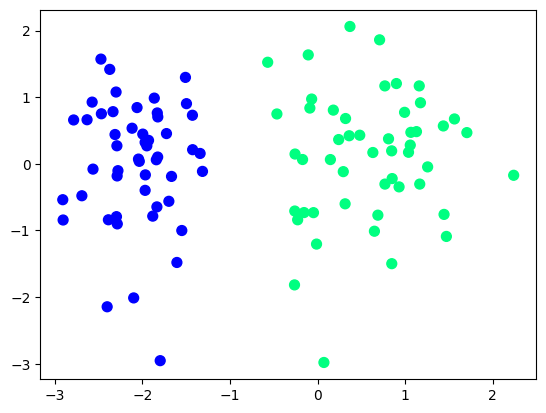

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_classes=2, n_features=2, n_clusters_per_class=1, class_sep=13,
                              n_informative=1, n_redundant=0, hypercube=False, random_state=41)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50)

In [52]:
class Neuron:
    def __init__(self, input_size, lr=0.01, random_state=42):
        np.random.seed(random_state)
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.lr = lr
        
        self.inputs = None
        self.target = None
        self.z = None
        self.output = None
        self.loss = None
        
    def __call__(self, inputs):
        self.inputs = inputs
        return self.forward(inputs)
    
    def get_params(self):
        return self.weights, self.bias
    
    def relu(self, x):
        return  np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x>0, 1.0, 0.0)
    
    def forward(self, inputs):
        out = np.dot(inputs, self.weights.T) + self.bias
        self.z = out
        out = self.relu(out)
        self.output = out
        return out
    
    def mse(self, target_labels, predicted_output):
        self.target = target_labels
        loss =  (target_labels - predicted_output) ** 2
        self.loss = loss
        return loss
    
    def backward(self):
        d_loss_relu = -2 * (self.target - self.output)
        d_relu_z = self.relu_derivative(self.z)
        d_z_w = self.inputs
        d_z_b = 1
        
        d_loss_w = d_loss_relu * d_relu_z * d_z_w
        d_loss_b = d_loss_relu * d_relu_z * d_z_b
        
        self.weights -= self.lr * d_loss_w
        self.bias -= self.lr * d_loss_b

In [53]:
import numpy as np

class Layer:
    def __init__(self, input_size, num_neurons, lr=0.01, random_state=42):
        self.neurons = [Neuron(input_size, lr, random_state) for _ in range(num_neurons)]
        
    def __call__(self, inputs):
        return self.forward(inputs)
    
    def forward(self, inputs):
        outputs = np.array([neuron(inputs) for neuron in self.neurons])
        return np.mean(outputs)
    
    def mse(self, target_labels, predicted_label):
        losses = [neuron.mse(target_labels, predicted_label) for neuron in self.neurons]
        return np.mean(losses)
    
    def backward(self):
        for neuron in self.neurons:
            neuron.backward()


In [54]:
epochs = 100
num_features = 2

model = Layer(num_features, 5)

In [55]:
losses = []
for epoch in range(epochs):
    total_loss = 0
    for features, output in zip(X, y):
        yhat = model(features)
        loss = model.mse(output, yhat)
        total_loss += loss
        model.backward()
    
    avg_loss = total_loss/len(y)
    losses.append(avg_loss)
    if epoch % 20==0:  
        print(f"EPOCH: {epoch} || LOSS: {avg_loss}")
        print('-'*100)

EPOCH: 0 || LOSS: 0.04618718147920482
----------------------------------------------------------------------------------------------------
EPOCH: 20 || LOSS: 0.03354117920138267
----------------------------------------------------------------------------------------------------
EPOCH: 40 || LOSS: 0.033541179201386
----------------------------------------------------------------------------------------------------
EPOCH: 60 || LOSS: 0.033541179201386
----------------------------------------------------------------------------------------------------
EPOCH: 80 || LOSS: 0.033541179201386
----------------------------------------------------------------------------------------------------


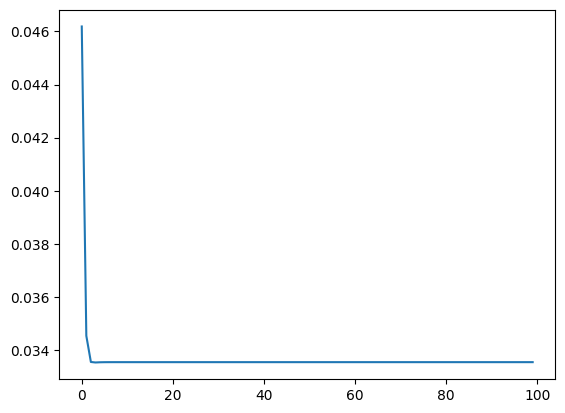

In [56]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [61]:
y_preds = []
for features in X:
    yhat = model(features)
    y_preds.append(int(yhat>0.5))

In [62]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [64]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
accuracy_score(y, y_preds)

1.0

In [66]:
print(classification_report(y, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

